# Missing category imputation
**Definition**
  * Replacing missing data with a new 'missing' category 
  * Widely used for categorical variables 

**Advantages**
  * Easy and fast 
  * captures the importance of 'missingness' if there is one
  * No assumption made on the data 

**Limitations**
  * If the number of NA is small, we are creating another small are category 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Read data

In [2]:
df = pd.read_csv('../data/house_price/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Explore data

In [4]:
categorical = df.columns[df.dtypes == 'O']
categorical

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [5]:
# columns that have null 
categorical_null = categorical[df[categorical].isnull().mean() > 0]
categorical_null

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [6]:
df[categorical_null].isnull().mean()

Alley           0.937671
MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [7]:
cols = ['BsmtQual', 'FireplaceQu']

X_train, X_test, y_train, y_test = train_test_split(df[cols + ['SalePrice']], 
                                                    df['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [8]:
X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
SalePrice      0.000000
dtype: float64

In [9]:
for col in cols:
    print(X_train[col].value_counts(dropna=False))

TA     463
Gd     430
Ex      82
NaN     24
Fa      23
Name: BsmtQual, dtype: int64
NaN    478
Gd     255
TA     229
Fa      26
Ex      18
Po      16
Name: FireplaceQu, dtype: int64


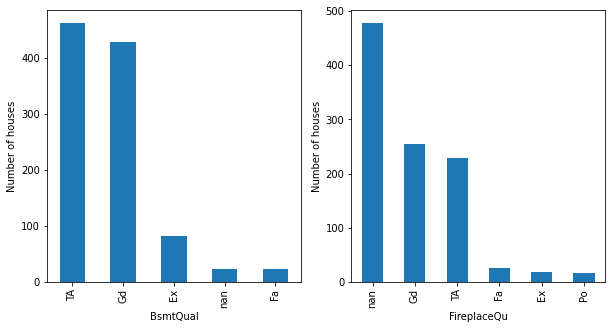

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, col in enumerate(cols):
    ax = plt.subplot(1, 2, i+1)
    X_train[col].value_counts(dropna=False).plot.bar()
    plt.xlabel(col)
    plt.ylabel('Number of houses')
plt.show()

# Missing category imputation

## Using Pandas

In [11]:
X_train_imputed = X_train.fillna('Missing')

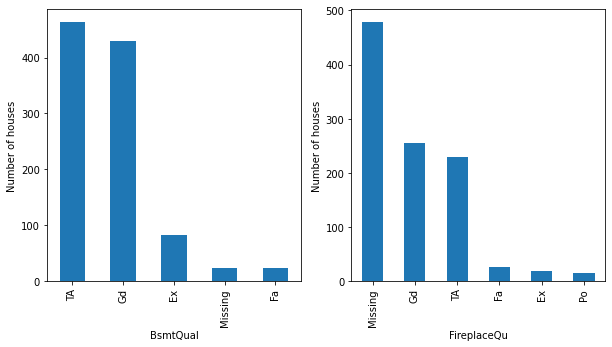

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, col in enumerate(cols):
    ax = plt.subplot(1, 2, i+1)
    X_train_imputed[col].value_counts(dropna=False).plot.bar()
    plt.xlabel(col)
    plt.ylabel('Number of houses')
plt.show()

## Using sklearn

In [13]:
imputer = SimpleImputer(strategy='constant', fill_value='Missing')
imputer.fit(X_train)

X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)

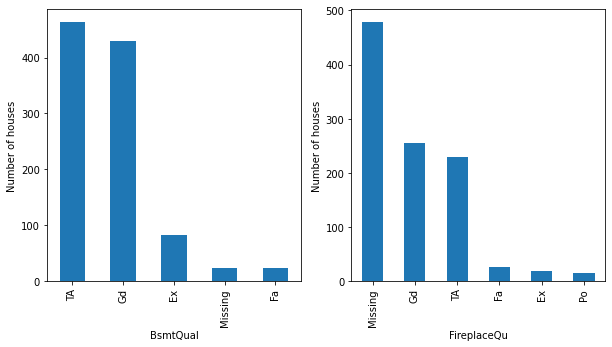

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, col in enumerate(cols):
    ax = plt.subplot(1, 2, i+1)
    X_train_imputed[col].value_counts(dropna=False).plot.bar()
    plt.xlabel(col)
    plt.ylabel('Number of houses')
plt.show()

## Using ColumnTransformer + SimpleImputer

In [15]:
transformer = ColumnTransformer(
    transformers=[
        ('missing_imputer', SimpleImputer(strategy='constant', fill_value='Missing'), cols)
    ])

transformer.fit(X_train)
X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)

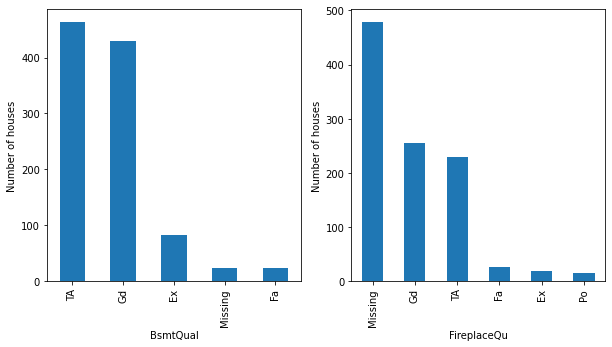

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, col in enumerate(cols):
    ax = plt.subplot(1, 2, i+1)
    X_train_imputed[col].value_counts(dropna=False).plot.bar()
    plt.xlabel(col)
    plt.ylabel('Number of houses')
plt.show()

# Check the distribution

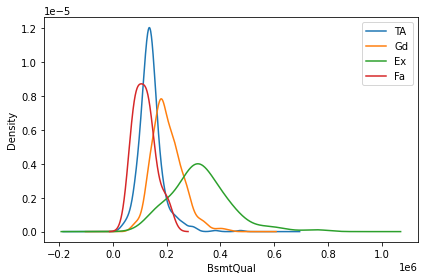

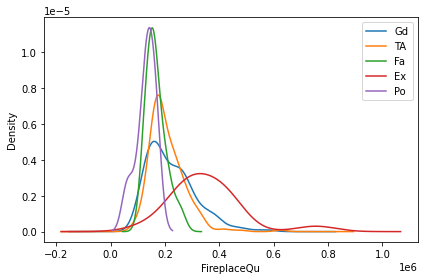

In [17]:
col = 'BsmtQual'

for col in cols:

    fig, ax = plt.subplots()
    cats = X_train[col].value_counts().keys()

    for cat in cats:
        X_train_imputed[X_train_imputed[col]==cat]['SalePrice'].plot(kind='kde')

    ax.legend(cats)
    ax.set_xlabel(col)
    plt.tight_layout()
    plt.show()